# Forest Cover Type 

По данным из датасета https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data необходимо предсказать тип лесного покрова(преобладающий вид древесного покрова) на основе картографических переменных. 
Район исследования включает в себя четыре территории дикой природы, расположенные в Национальному лесу Рузвельта в Северном Колорадо. Каждое наблюдение - это участок земли размером $30 * 30$ метров.
При этом есть __семь__ типов лесного покрова:
* Ель / Пихта
* Лоджпол Сосна
* Сосна Пондероза
* Коттонвуд / Ива
* Аспен
* Пихта Дугласа
* Круммхольц

Этот набор данных включает в себя информацию о типе деревьев, теневом покрове, расстоянии до близлежащих достопримечательностей (дорог и т. д.), типе почвы и местной топографии.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from matplotlib import rcParams
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("covtype.csv")
print(f"Размеры датасета = {data.shape}")
rows, columns = data.shape
print(f"Число объектов = {rows}")
print(f"Число признаков = {columns}")
data.head(15)

Размеры датасета = (581012, 55)
Число объектов = 581012
Число признаков = 55


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


# Data Fields and Exploratory

In [5]:
pd.Series(data.columns)

0                              Elevation
1                                 Aspect
2                                  Slope
3       Horizontal_Distance_To_Hydrology
4         Vertical_Distance_To_Hydrology
5        Horizontal_Distance_To_Roadways
6                          Hillshade_9am
7                         Hillshade_Noon
8                          Hillshade_3pm
9     Horizontal_Distance_To_Fire_Points
10                      Wilderness_Area1
11                      Wilderness_Area2
12                      Wilderness_Area3
13                      Wilderness_Area4
14                            Soil_Type1
15                            Soil_Type2
16                            Soil_Type3
17                            Soil_Type4
18                            Soil_Type5
19                            Soil_Type6
20                            Soil_Type7
21                            Soil_Type8
22                            Soil_Type9
23                           Soil_Type10
24              

_Заголовки в данном датасете характеризуют следующее_:
* __Elevation__ - высота над уровнем моря
* __Aspect__ - аспект в градусах азимута
* __Slope__ - уклон в градусах
* __Horizontal_Distance_To_Hydrology__ - расстояние по горизонтали до ближайших объектов поверхностных вод
* __Upper_Distance_to_Hygrology__ - расстояние по вертикали до ближайших объектов поверхностных вод
* __Horizontal_Distance_To_Roadways__ - расстояние по горизонтали до ближайшей дороги
* __Hillshade_9am__ (индекс от 0 до 255) - индекс отмывки в 9 часов утра(летнее солнцестояние)
* __Hillshade_Noon__ (индекс от 0 до 255) - индекс отмывки в полдень(летнее солнцестояние)
* __Hillshade_3pm__ (индекс от 0 до 255) - индекс отмывки в 15:00(летнее солнцестояние)
* __Horizontal_Distance_To_Fire_Points__ - расстояние по горизонтали до ближайших точек возгорания лесных пожаров
* __Wilderness_Area__ (4 бинарных признака) - обозначение территории дикой природы
* __Soil_Type__ (40 бинарных признаков) - обозначение типа почвы
* __Cover_Type__ (7 типов) - обозначение типа лесного покрова - __Наш target__

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

   Можно уже отметить, что все признаки являются _числовыми_(что упростит дальнейшую предобработку в целом). Кроме того, данный метод позволил нам сразу удостовериться в __отсутствии пропущенных значений__, поскольку все 581012 объектов по всем признакам имеют 581012 _non-null_ значений, что совпадает с кол-вом объектов.  <br />
   Для достоверности проверим это:

In [7]:
data.notna()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
581008,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
581009,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
581010,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [8]:
a = data.notna().sum()

In [9]:
print(f"Количество пропущенных значений = {data.isna().sum().sum()}")
print("Кол-во объектов =", rows)
print(rows == rows - data.isna().sum().sum())

Количество пропущенных значений = 0
Кол-во объектов = 581012
True


# Classes for classification

Найдём несбалансированность классов

In [10]:
target = data["Cover_Type"]
values = target.value_counts()
prop = values.apply(lambda x: x / np.sum(values))
prop

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

<AxesSubplot: xlabel='Cover_Type', ylabel='count'>

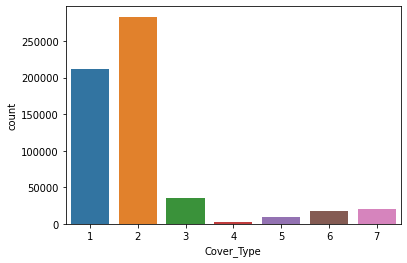

In [11]:
sns.countplot(data=data, x="Cover_Type")

# Feature classification

Датасет содержит как _числовые_, так и _категориальные_ фичи, а именно: 
* 10 числовых признаков
* 44 категориальных признаков

In [12]:
contiguous_data = data.iloc[:, :10]
contiguous_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


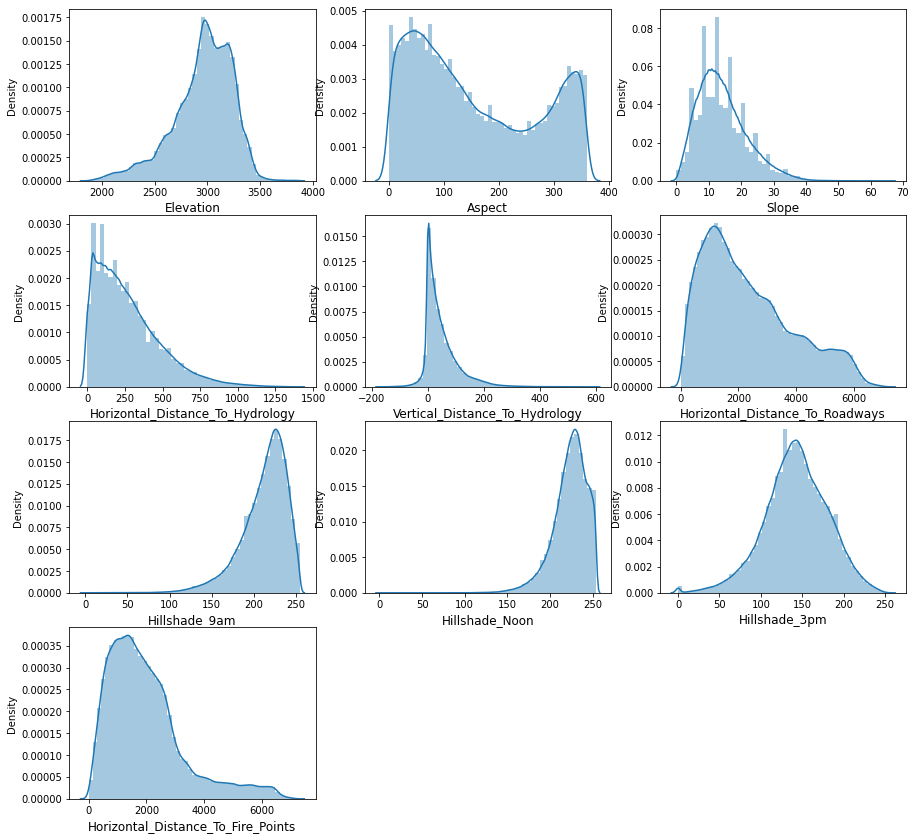

In [13]:
plt.figure(figsize=(15, 60), facecolor='white')
k = 1
for column in contiguous_data:
    ax = plt.subplot(16, 3, k)
    sns.distplot(contiguous_data[column], kde=True)
    plt.xlabel(column, fontsize=12)
    k += 1
plt.show()

In [14]:
cat_data = data.drop(["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
                      "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points", "Hillshade_9am",
                      "Hillshade_Noon", "Hillshade_3pm"],axis=1)

In [15]:
cat_data

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
581008,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
581009,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
581010,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


<AxesSubplot: xlabel='Cover_Type', ylabel='Elevation'>

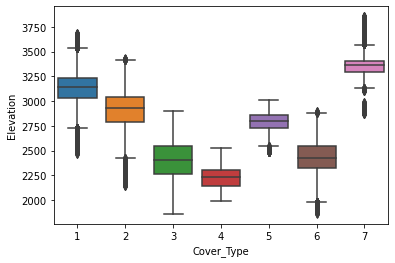

In [16]:
sns.boxplot(data=data, x="Cover_Type", y="Elevation")

"Ящик с усами" в данном случае не говорит нам о выбросах.

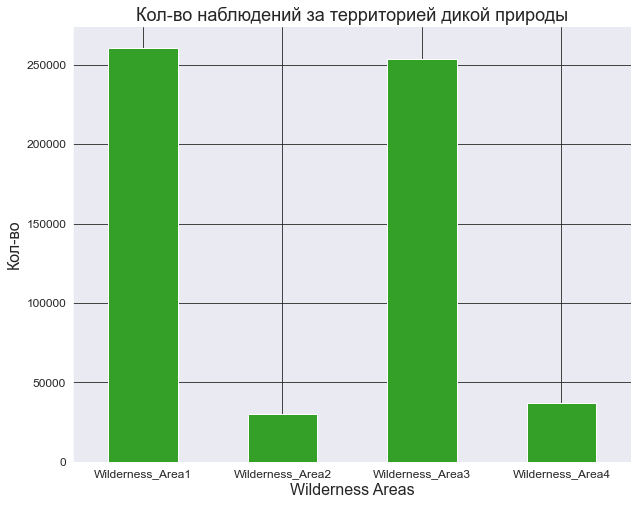

In [17]:
cat_features = data.iloc[:, 10:-1]
wild_area_data, soil_type_data = cat_features.iloc[:, :4], cat_features.iloc[:, 4:]
sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
palette = sns.color_palette(flatui)
wild_area_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('Кол-во наблюдений за территорией дикой природы', size=18)
plt.xlabel('Wilderness Areas', size=16)
plt.ylabel('Кол-во', size=16)
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)
sns.despine()
plt.show()

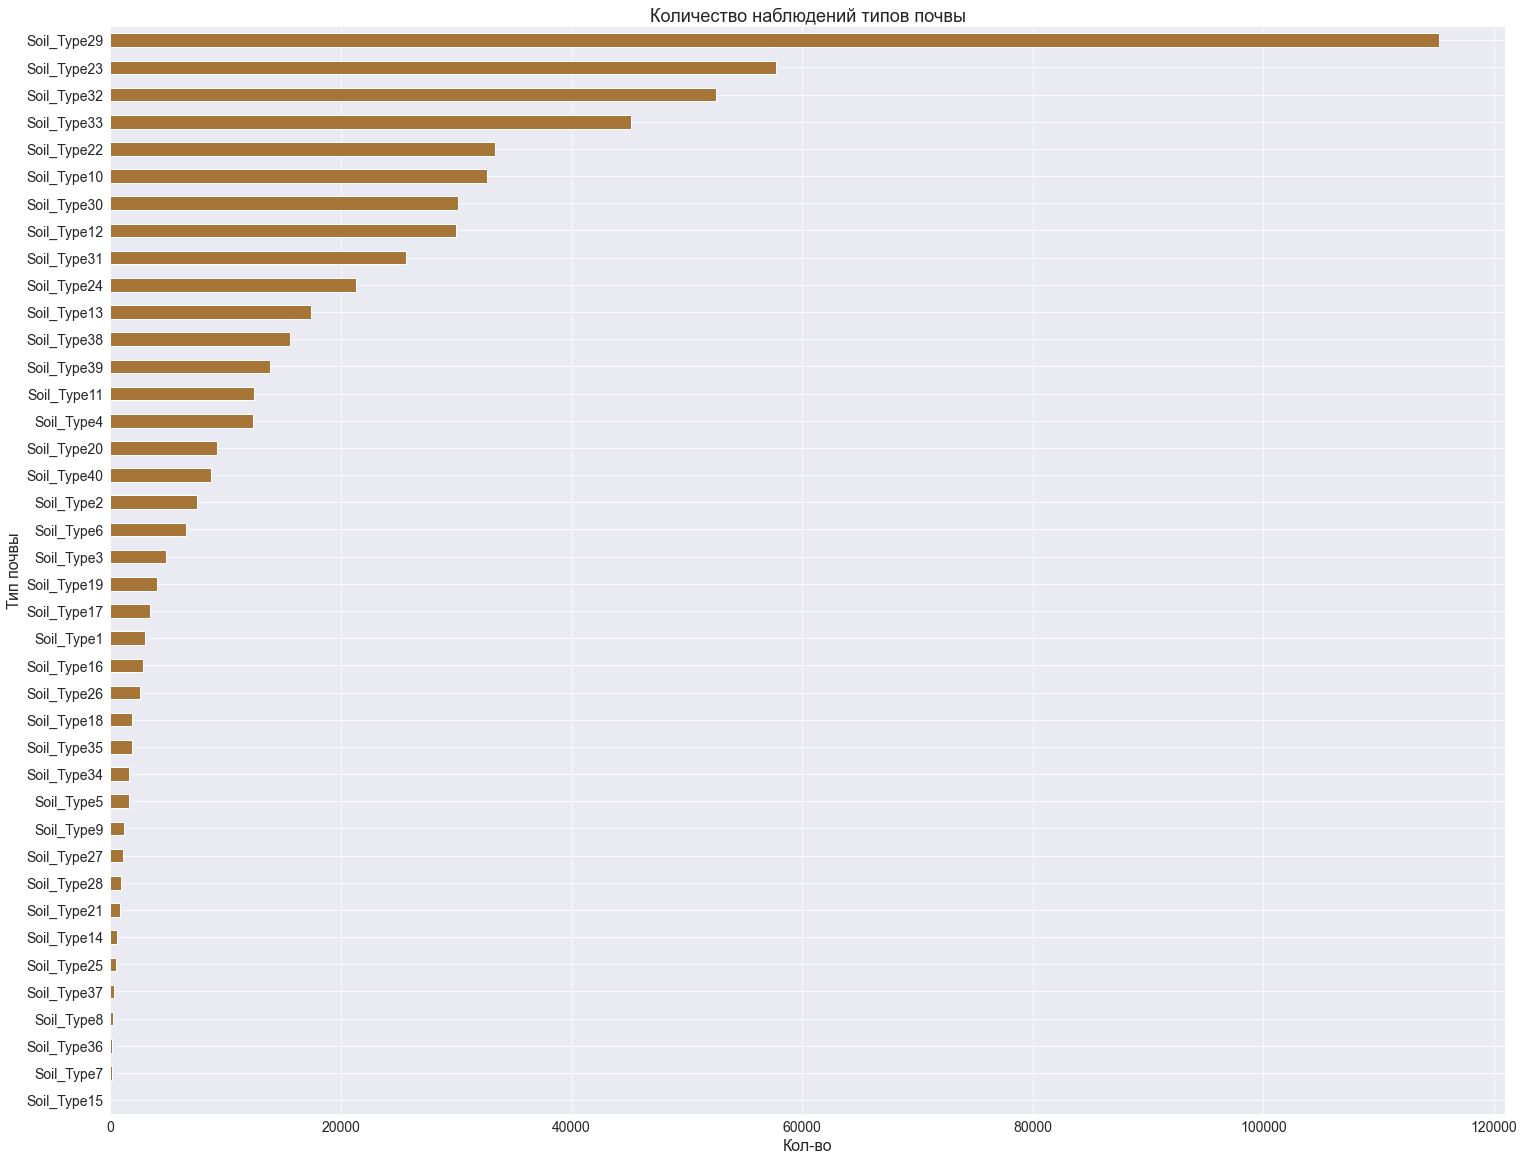

In [18]:
sns.set_style("darkgrid", {'grid_color': '.1'})
soil_sum = pd.Series(soil_type_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)
soil_sum.plot(kind='barh', figsize=(25,20), color='#a87539')
plt.gca().invert_yaxis()
plt.title('Количество наблюдений типов почвы', size=18)
plt.xlabel('Кол-во', size=16)
plt.ylabel('Тип почвы', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)
sns.despine()
plt.show()

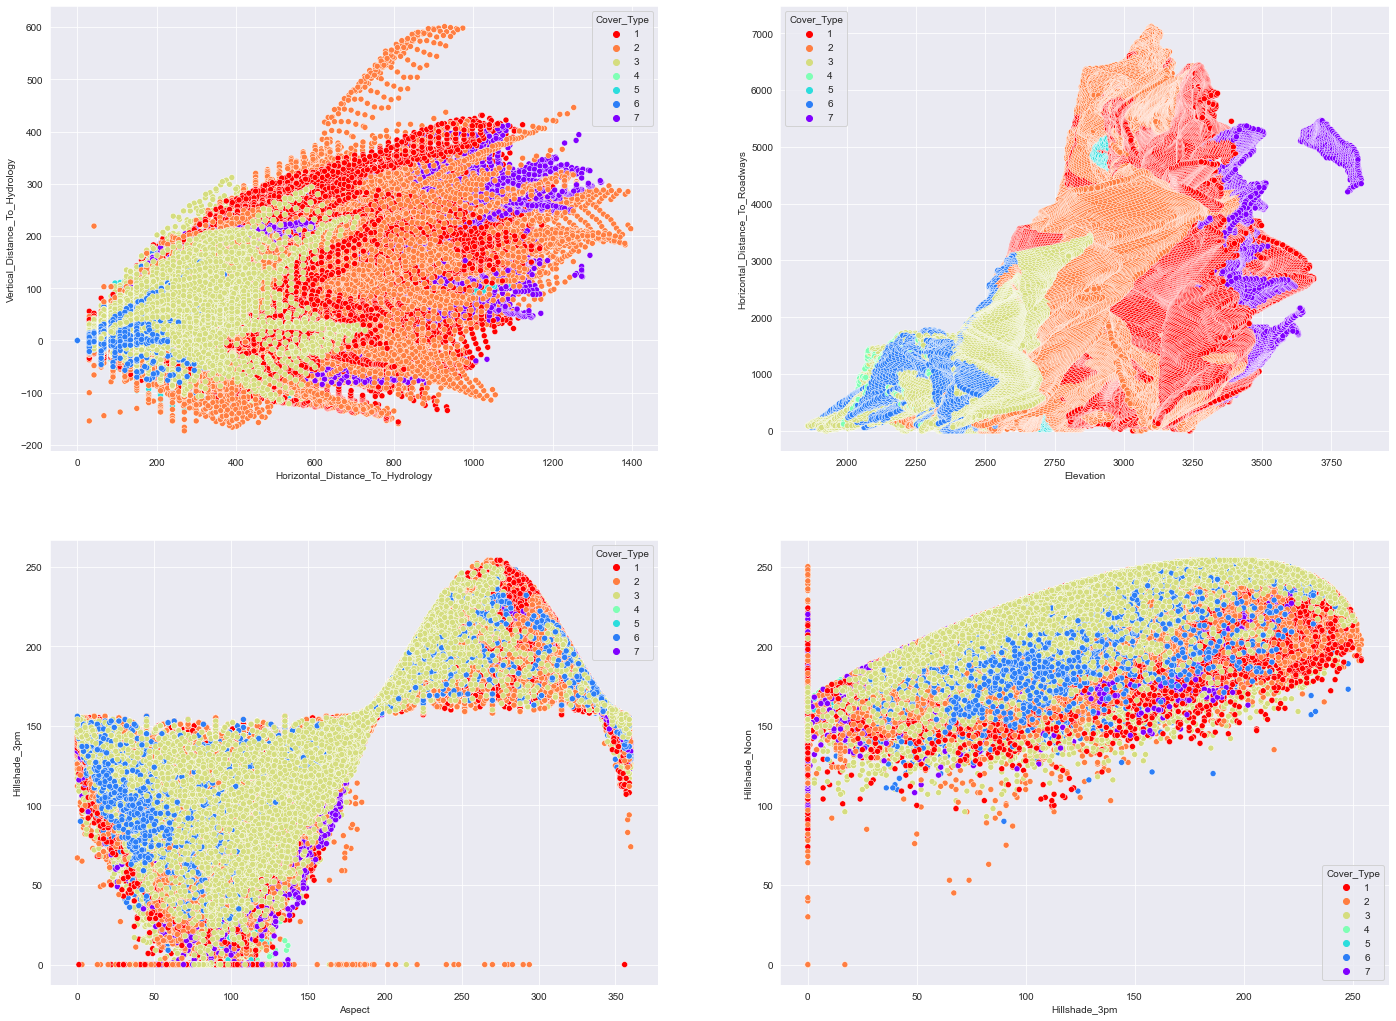

In [19]:
fig, ax = plt.subplots(2,2, figsize=(24,18))

sns.scatterplot(data=data, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=data, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=data, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=data, x="Hillshade_3pm", y="Hillshade_Noon", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()

In [20]:
X_cat = data.iloc[:, 10:54]
X_num = data.iloc[:, :10]

<AxesSubplot: >

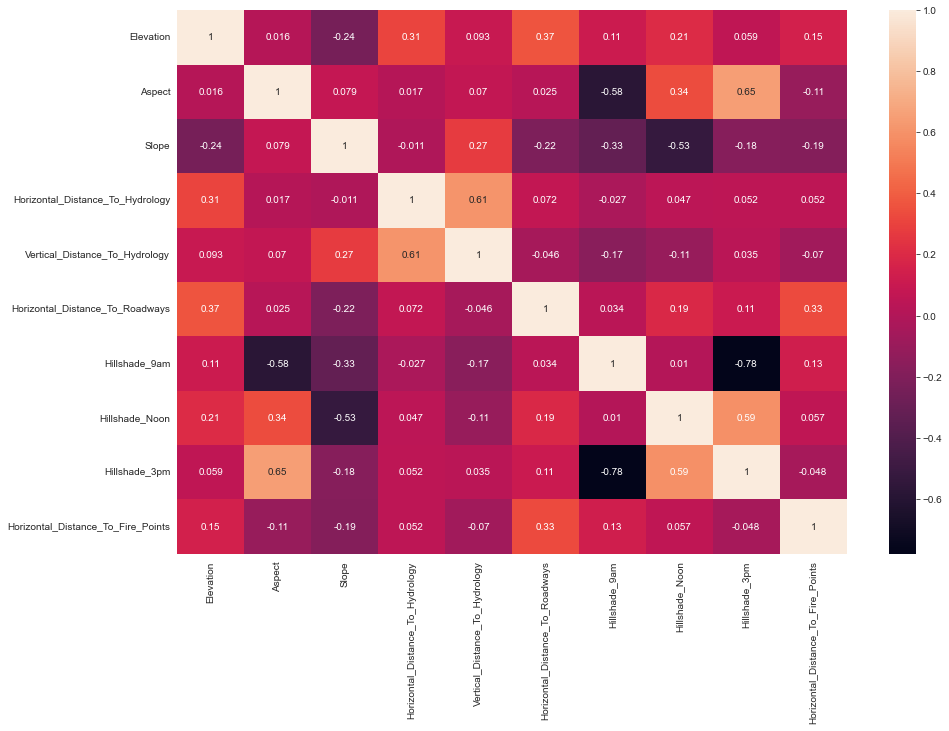

In [21]:
plt.figure(figsize=(15, 10))
num_features_corr = X_num.corr()
sns.heatmap(num_features_corr, annot=True, fmt='.2g')

In [22]:
num_features_corr = np.triu(num_features_corr, k=1)
high_corr_indexes = np.where(abs(num_features_corr) > 0.5)
for i, j in zip(high_corr_indexes[0], high_corr_indexes[1]):
    print(f'Корреляция больше 0.5 по модулю между признаками: {X_num.columns[i]}, {X_num.columns[j]}')

Корреляция больше 0.5 по модулю между признаками: Aspect, Hillshade_9am
Корреляция больше 0.5 по модулю между признаками: Aspect, Hillshade_3pm
Корреляция больше 0.5 по модулю между признаками: Slope, Hillshade_Noon
Корреляция больше 0.5 по модулю между признаками: Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology
Корреляция больше 0.5 по модулю между признаками: Hillshade_9am, Hillshade_3pm
Корреляция больше 0.5 по модулю между признаками: Hillshade_Noon, Hillshade_3pm


<AxesSubplot: >

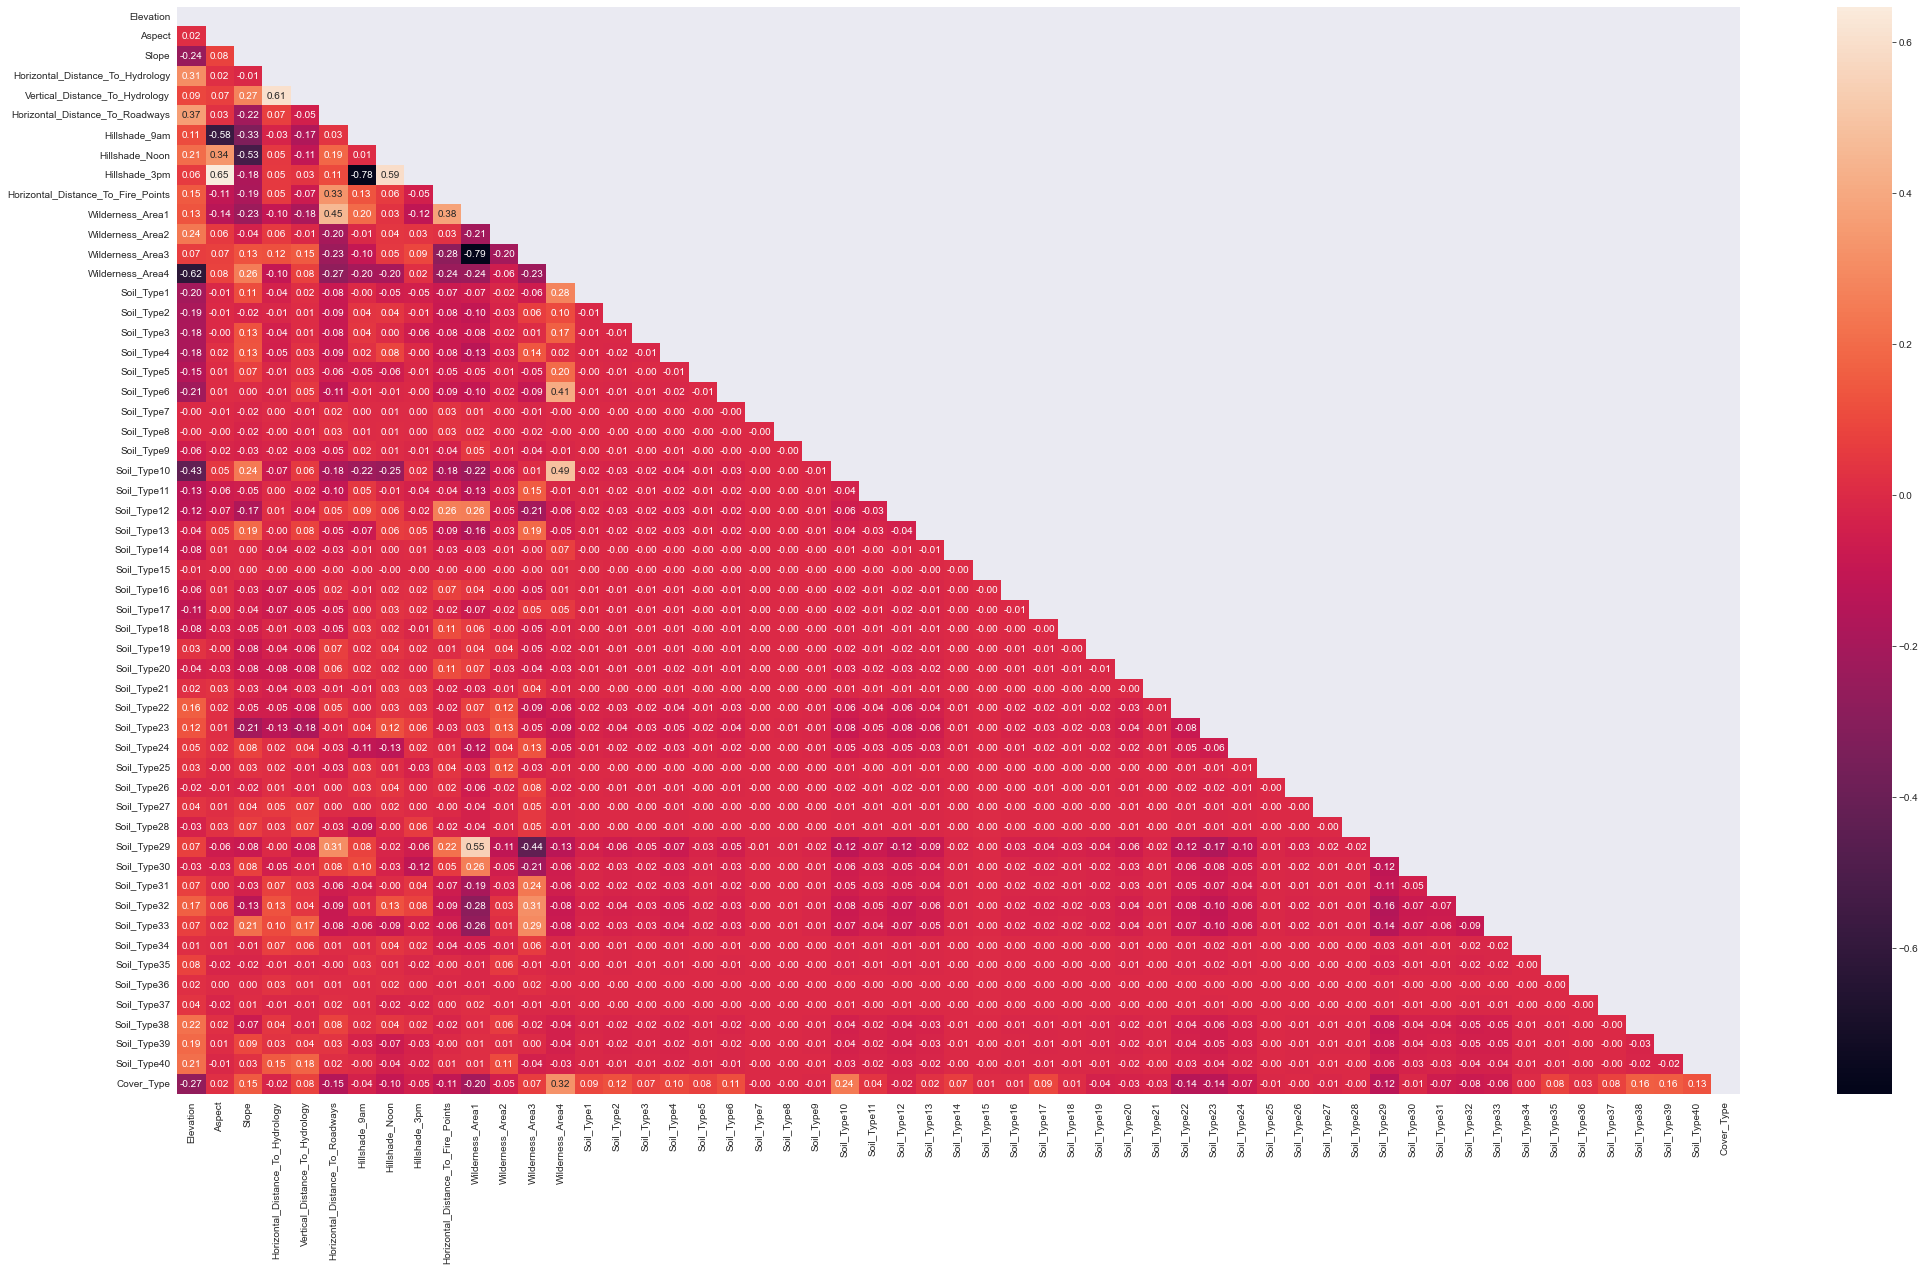

In [23]:
plt.figure(figsize=(35, 20))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f')

## Preprocessing

In [24]:
first_column = data.pop('Cover_Type')
data.insert(0, 'Cover_Type', first_column)

In [25]:
data.head(10)

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,5,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,5,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,2,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,2,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0
5,2,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,0
6,5,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,0
7,5,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,0
8,5,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,0
9,5,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_cat = data.iloc[:, 11:55].values
X_num = data.iloc[:, 1:11].values
y = data.iloc[:, 0].values

Отмасштабируем признаки, поскольку многие из них измеряются по-разному и поскольку некоторые методы МО чувствительны к ненормализованным данным. Здесь я использую __StandardScaler__ 

In [27]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)
pd.DataFrame(X_num)

,0,1,2,3,4,5,6,7,8,9
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479
...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997


In [28]:
X = np.hstack((X_num, X_cat))
y = data.iloc[:, 0].values

In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Application of ML Models

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [31]:
result = pd.DataFrame(np.vstack((y_test, log_reg.predict(X_test))))
result.index = ["y", "f(x)"]
result

,0,1,2,3,4,5,6,7,8,9,...,116193,116194,116195,116196,116197,116198,116199,116200,116201,116202
y,1,2,2,2,2,3,2,1,2,2,...,1,1,2,6,2,2,2,2,2,7
f(x),1,2,2,2,2,3,2,1,1,2,...,1,1,1,2,1,2,2,2,2,7


In [32]:
score = log_reg.score(X_test, y_test)
score

0.7238453396211801

In [33]:
from sklearn.metrics import classification_report


print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.67      0.81      0.73      7121
           4       0.55      0.38      0.45       526
           5       0.21      0.01      0.01      1995
           6       0.49      0.23      0.31      3489
           7       0.72      0.57      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.58      0.50      0.52    116203
weighted avg       0.71      0.72      0.71    116203



### Logistic Regression with L2-penalty

In [34]:
log_reg_with_penalty = LogisticRegression(penalty='l2')
log_reg_with_penalty.fit(X_train, y_train)

LogisticRegression()

In [35]:
log_reg_with_penalty.score(X_test, y_test)

0.7240174522172406

Качество такой модели не сильно увеличилось засчет регуляризации, поскольку она помогает в случаях переобучения и отсутствия сходимости конкретной модели.

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

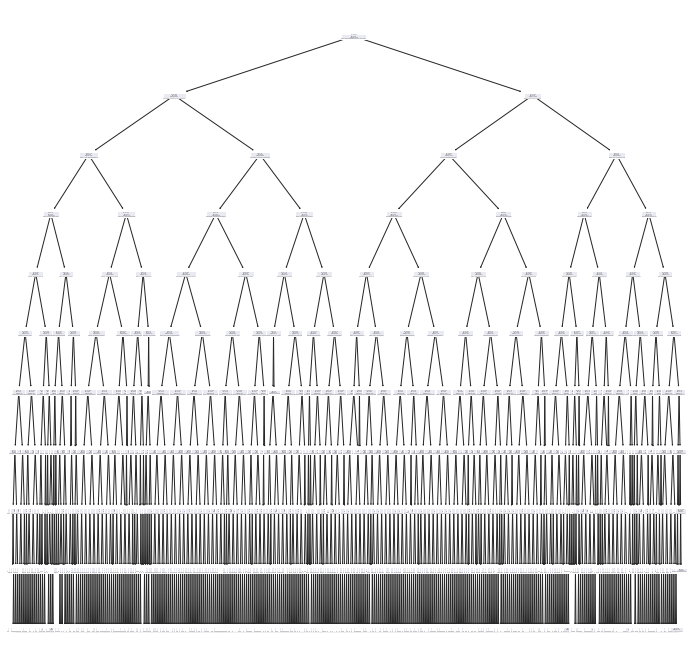

In [37]:
from sklearn import tree


fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, ax=ax)
plt.show()

In [38]:
clf.score(X_test, y_test)

0.7768474135779627

In [39]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.76      0.78      0.77     42557
           2       0.79      0.82      0.81     56500
           3       0.73      0.86      0.79      7121
           4       0.82      0.65      0.72       526
           5       0.83      0.22      0.35      1995
           6       0.75      0.21      0.33      3489
           7       0.88      0.72      0.79      4015

    accuracy                           0.78    116203
   macro avg       0.79      0.61      0.65    116203
weighted avg       0.78      0.78      0.77    116203



Увеличим глубину решающего дерева до 15

In [40]:
deeper_clf = DecisionTreeClassifier(max_depth=15)
deeper_clf.fit(X_train, y_train)
deeper_clf.score(X_test, y_test)

0.8507783792156829

$Score$ классификатора возрастает. Посмотрим,как будет изменяться качество модели при увеличении параметра максимальной глубины. В данном случае под $Score$ необходимо принимать $R^2$, который далеко не всегда при показателе, близком к 1, дает хорошую модель, поскольку модель может переобучиться

In [41]:
scores = []
for depth in [i for i in range(1, 21)]:
    current_clf = DecisionTreeClassifier(max_depth=depth)
    current_clf.fit(X_train, y_train)
    scores.append(np.around(current_clf.score(X_test, y_test), 3))

In [42]:
for i, score in enumerate(scores):
    print(f"Score при глубине дерева {i+1} = {score}")

Score при глубине дерева 1 = 0.634
Score при глубине дерева 2 = 0.67
Score при глубине дерева 3 = 0.677
Score при глубине дерева 4 = 0.7
Score при глубине дерева 5 = 0.702
Score при глубине дерева 6 = 0.716
Score при глубине дерева 7 = 0.727
Score при глубине дерева 8 = 0.742
Score при глубине дерева 9 = 0.76
Score при глубине дерева 10 = 0.777
Score при глубине дерева 11 = 0.793
Score при глубине дерева 12 = 0.808
Score при глубине дерева 13 = 0.822
Score при глубине дерева 14 = 0.837
Score при глубине дерева 15 = 0.851
Score при глубине дерева 16 = 0.862
Score при глубине дерева 17 = 0.876
Score при глубине дерева 18 = 0.887
Score при глубине дерева 19 = 0.896
Score при глубине дерева 20 = 0.906


Попробуем с помощью кросс-валидации подобрать оптимальный параметр(кол-во фолдов = 5)

In [43]:
from sklearn.model_selection import cross_val_score


depths_range = list(range(1, 20))
accuracy_scores = []
for depth in depths_range:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X, y, cv=5)
    accuracy_scores.append(np.mean(scores))

Text(0, 0.5, 'Accuracy')

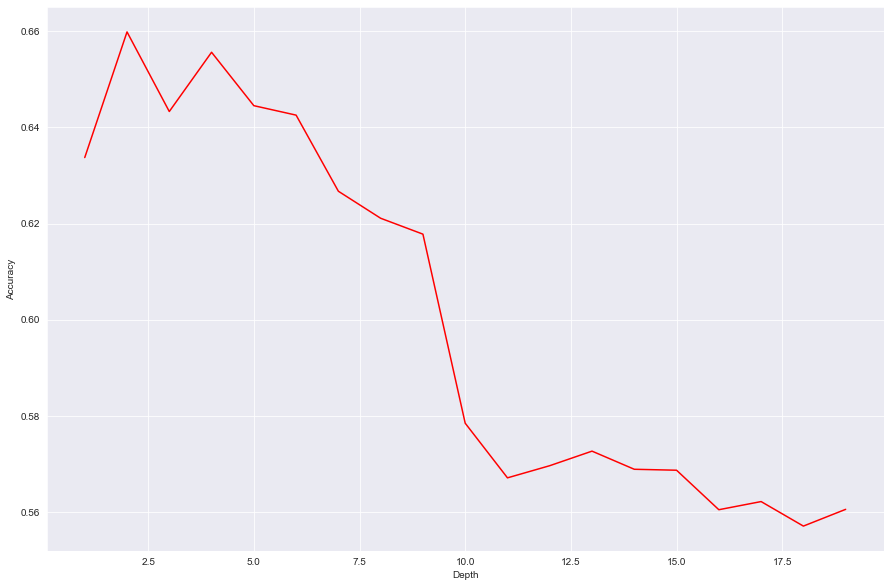

In [44]:
plt.figure(figsize=(15, 10))
plt.plot(depths_range, accuracy_scores, color='red')
plt.grid(True)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [45]:
print(f"Оптимальная глубина дерева = {depths_range[np.argmax(accuracy_scores)]}")

Оптимальная глубина дерева = 2


### Knn 

In [46]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
knn.score(X_test, y_test)

0.9280999629957919

In [48]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93     42557
           2       0.93      0.95      0.94     56500
           3       0.90      0.92      0.91      7121
           4       0.85      0.73      0.78       526
           5       0.84      0.76      0.80      1995
           6       0.84      0.81      0.82      3489
           7       0.94      0.94      0.94      4015

    accuracy                           0.93    116203
   macro avg       0.89      0.86      0.87    116203
weighted avg       0.93      0.93      0.93    116203



Очень хороший показатель для тестовой выборки, но очень(еще раз очень) долго считает

Подсчитаем точность на обучающей и тестовой выборке

In [49]:
from sklearn.metrics import accuracy_score


y_pred = knn.predict(X_train)
print(f"accuracy на обучающей выборке = {accuracy_score(y_train, y_pred)}")
print(f"accuracy на тестовой выборке = {accuracy_score(y_test, knn.predict(X_test))}")

accuracy на обучающей выборке = 0.9562616042288338
accuracy на тестовой выборке = 0.9280999629957919


## Report

Соберем метрики качества для различных классификаторов. По сути говоря, создадим некий отчет для "ручного" Model Selection.

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = [log_reg, log_reg_with_penalty, clf, knn]
metrics = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    current_model_metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                             recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
    metrics.append(current_model_metrics)

In [51]:
df_metrics = pd.DataFrame(metrics)
df_metrics.columns = ["accuracy", "precision", "recall", "f1-score"]
df_metrics.index = ["Log Reg", "L2-Log Reg", "Decision Tree", "KNN"]
df_metrics

,accuracy,precision,recall,f1-score
Log Reg,0.723845,0.711039,0.723845,0.713222
L2-Log Reg,0.724017,0.711244,0.724017,0.713568
Decision Tree,0.896027,0.896065,0.896027,0.895248
KNN,0.928100,0.927834,0.928100,0.927862


В этих данных есть коррелированные фичи, причем сильно коррелируют они не с таргетом, а с остальными фичами. Это может привести к ряду проблем:
* __Мультиколлинеарность__
* __Переобучение__
* __Ухудшение качества модели и ее точности(последнее следует из мультиколлинеарности)__

Но для проверки всего этого в логистическую регрессию был введен параметр регуляризации, который не сильно изменил точность модели. Поэтому можно сделать вывод, что исключение коррелированных признаков не даст сильного улучшения модели.

### Несбалансированность классов

In [52]:
data["Cover_Type"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

<AxesSubplot: xlabel='Cover_Type', ylabel='count'>

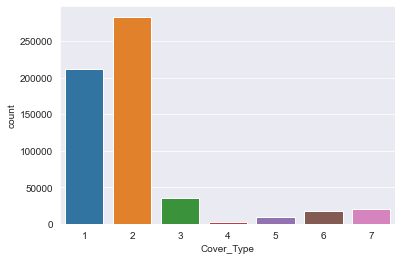

In [53]:
sns.countplot(data=data, x="Cover_Type")

Из распределения видно, что преобладают лесные покровы 1 и 2 типов, в то время как 4 типа почти и нет в данных. Это приводит к смещению модели в сторону преобладающих классов.

Способы борьбы с _несбалансированностью классов_:
* Использование взвешивания классов - для меньших классов больший вес, для больших классов - наоборот
* Undersampling и Oversampling - методы сэмплирования для балансировки обучающей выборки
* Возможно использовать бустинг

In [54]:
balanced_clf = DecisionTreeClassifier(class_weight='balanced')
balanced_clf.fit(X_train, y_train)
accuracy_score(y_test, balanced_clf.predict(X_test))

0.9364904520537336

In [55]:
y_pred = balanced_clf.predict(X_train)
print(f"accuracy на обучающей выборке = {accuracy_score(y_train, y_pred)}")
print(f"accuracy на тестовой выборке = {accuracy_score(y_test, balanced_clf.predict(X_test))}")

accuracy на обучающей выборке = 1.0
accuracy на тестовой выборке = 0.9364904520537336


In [56]:
print(classification_report(y_test, balanced_clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.94      0.95      0.95     56500
           3       0.93      0.92      0.92      7121
           4       0.85      0.82      0.83       526
           5       0.85      0.80      0.83      1995
           6       0.87      0.86      0.86      3489
           7       0.95      0.94      0.94      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.89      0.90    116203
weighted avg       0.94      0.94      0.94    116203



Точность 1 на обучающей выборке может сигнализировать о переобучении, но правда ее же показатель на тестовой выборке заметнее улучшился при взвешивании классов

## Д/з до 29.12

### Логистическая регрессия

In [60]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)

LogisticRegression()

In [62]:
print(classification_report(y_test, logreg_clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.67      0.81      0.73      7121
           4       0.56      0.38      0.45       526
           5       0.21      0.01      0.01      1995
           6       0.49      0.24      0.32      3489
           7       0.72      0.57      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.50      0.52    116203
weighted avg       0.71      0.72      0.71    116203



In [63]:
param_grid = {"C": np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
grid = GridSearchCV(logreg_clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Наилучшие параметры: ", grid.best_params_)
y_pred = grid.predict(X_test)

Наилучшие параметры:  {'C': 100.0, 'penalty': 'l2'}
Accuracy модели: 0.7239572128086194


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

Кросс-валидация по 5 фолдам подобрала следующие параметры:
* Использование L2-регуляризации
* Значение параметра С - параметр, определяющий силу(вес) регуляризации

In [67]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy модели: 0.7239572128086194


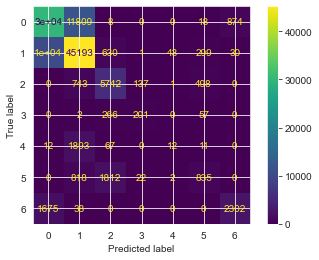

In [88]:
disp_conf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, logreg_clf.predict(X_test), labels=logreg_clf.classes_))
disp_conf.plot()

Факт преобладания первого и второго классов на лицо. Особенно хорошо это заметно в 1(2) столбце матрицы ошибок - 1893 сэмпла модель предсказала как 2 класс(преобладающий), хотя на самом деле они относятся к 5 классу.

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
y_pred = forest_clf.predict(X_train)

In [115]:
y_pred = forest_clf.predict(X_test)
print(f"RandomForest: mean = {round((y_test == y_pred).mean(), 3)}")
print(f'Precision = {precision_score(y_test, y_pred, average="micro"):.3f},')
print(f'Recall = {recall_score(y_test, y_pred, average="micro"):.3f},')
print(f'F1 = {f1_score(y_test, y_pred, average="micro"):.3f}')
print(confusion_matrix(y_test, y_pred))

RandomForest: mean = 0.954
Precision = 0.954,
Recall = 0.954,
F1 = 0.954
[[40143  2300     1     0     9     6    98]
 [ 1293 54954    94     0    82    63    14]
 [    2   105  6864    19     6   125     0]
 [    0     0    67   446     0    13     0]
 [   34   402    16     0  1532    11     0]
 [    2   110   218    19     2  3138     0]
 [  171    21     0     0     1     0  3822]]


<Figure size 1080x720 with 0 Axes>

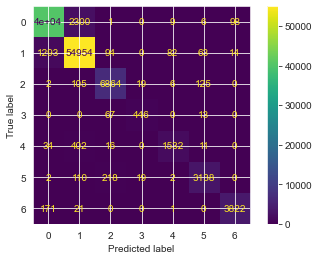

In [87]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=forest_clf.classes_))
disp.plot()

Хорошие показатели для Случайного леса, но это скорее всего связано с тем, что в данном датасете колоссальное преобладание 1 и 2 классов. Возможно модель склонна предсказывать преобладающий класс, зачастую игнорируя менее распространенные классы. Хотя и показатели для других классов вполне являются неплохими. 

### MLPClassifier

In [94]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), 
                          solver='adam',
                          activation='relu',
                          max_iter=1000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

С двумя скрытыми слоями полносвязная нейросеть обучалась достаточно долго, поэтому здесь я опущу кросс-валидацию.

In [96]:
y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

In [101]:
unique_elements, counts = np.unique(y_pred_train, return_counts=True)
print("Предсказание нейросети для Train: ", dict(zip(unique_elements, counts)))

Предсказание нейросети для Train:  {1: 195035, 2: 203871, 3: 34250, 4: 1694, 5: 5678, 6: 9174, 7: 15107}


In [102]:
unique_elements, counts = np.unique(y_pred_test, return_counts=True)
print("Предсказание нейросети для Test: ", dict(zip(unique_elements, counts)))

Предсказание нейросети для Test:  {1: 48957, 2: 51017, 3: 8480, 4: 399, 5: 1440, 6: 2252, 7: 3658}


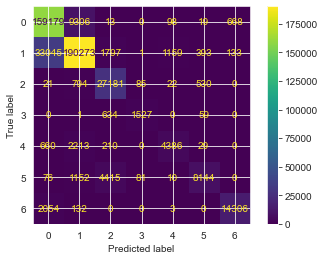

In [106]:
conf_display_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train, labels=mlp_model.classes_))
conf_display_train.plot()

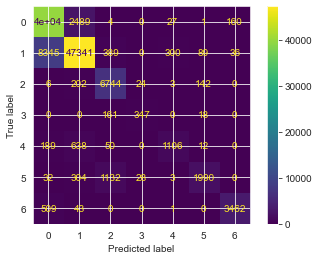

In [107]:
conf_display_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test, labels=mlp_model.classes_))
conf_display_train.plot()

In [114]:
print("Качество на обучающей выборке")
print(f"MLPClassifier: mean = {round((y_pred_train == y_train).mean(), 3)}")
print(f'Precision = {precision_score(y_train, y_pred_train, average="micro"):.3f},', end=' ')
print(f'F1 = {f1_score(y_train, y_pred_train, average="micro"):.3f}')
print(f'Recall = {recall_score(y_train, y_pred_train, average="micro"):.3f}')
print(f"Accuracy = {accuracy_score(y_train, y_pred_train):.3f}")

Качество на обучающей выборке
MLPClassifier: mean = 0.871
Precision = 0.871, F1 = 0.871
Recall = 0.871
Accuracy = 0.871


In [112]:
print("Качество на тестовой выборке")
print(f"MLPClassifier: mean = {round((y_pred_test == y_test).mean(), 3)}")
print(f'Precision = {precision_score(y_test, y_pred_test, average="micro"):.3f},', end=' ')
print(f' F1 = {f1_score(y_test, y_pred_test, average="micro"):.3f}')
print(f'Recall = {recall_score(y_test, y_pred_test, average="micro"):.3f}')
print(f"Accuracy = {accuracy_score(y_test, y_pred_test):.3f}")

Качество на тестовой выборке
MLPClassifier: mean = 0.868
Precision = 0.868,  F1 = 0.868
Accuracy = 0.868


Переобучения и недообучения нет.